# Predicting Airbnb Listing Quality Using Machine Learning
### ( Data Science - Mini project ) 
 **Mohamed Adnan PK, MBA.,MSc**

This project predicts Airbnb listing quality ("good" or "bad") using Decision Tree and Logistic Regression models. Key steps included Data Cleaning, Data Analysis, Feature Engineering, Hyperparameter Tuning and Model Evaluation .

In [1]:
## 1: Data Processing - Airbnb 
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import chain
import re

print('import completed')

import completed


In [2]:
import ast
from collections import Counter

### 1. Data Processing

In [3]:
df = pd.read_csv('listings.csv', low_memory=False)
df.shape

(87946, 75)

In [4]:
df_r = pd.read_csv('reviews.csv', low_memory=False)
df.shape

(87946, 75)

In [5]:
# Display basic info and check for missing values
print("Dataset_Reviews Information:\n")
df_r.info()

Dataset_Reviews Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581033 entries, 0 to 1581032
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1581033 non-null  int64 
 1   date        1581033 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.1+ MB


In [6]:
# Display basic info and check for missing values
print("Dataset Information:\n")
df.describe().T

Dataset Information:



,count,mean,std,min,25%,50%,75%,max
id,87946.0,3.586523e+17,4.121119e+17,1.391300e+04,2.215818e+07,4.935854e+07,8.164776e+17,9.738958e+17
scrape_id,87946.0,2.023091e+13,2.626577e+01,2.023091e+13,2.023091e+13,2.023091e+13,2.023091e+13,2.023091e+13
host_id,87946.0,1.589904e+08,1.694033e+08,4.775000e+03,2.186737e+07,8.140696e+07,2.668211e+08,5.355140e+08
host_listings_count,87941.0,4.866663e+01,2.934652e+02,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,3.023000e+03
host_total_listings_count,87941.0,8.580980e+01,5.236344e+02,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+01,5.272000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,87946.0,5.150956e+01,4.874880e-02,5.129594e+01,5.148337e+01,5.151378e+01,5.153942e+01,5.168164e+01
longitude,87946.0,-1.279001e-01,9.964472e-02,-4.978000e-01,-1.891737e-01,-1.264002e-01,-6.806625e-02,2.957307e-01
accommodates,87946.0,3.165386e+00,1.980390e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


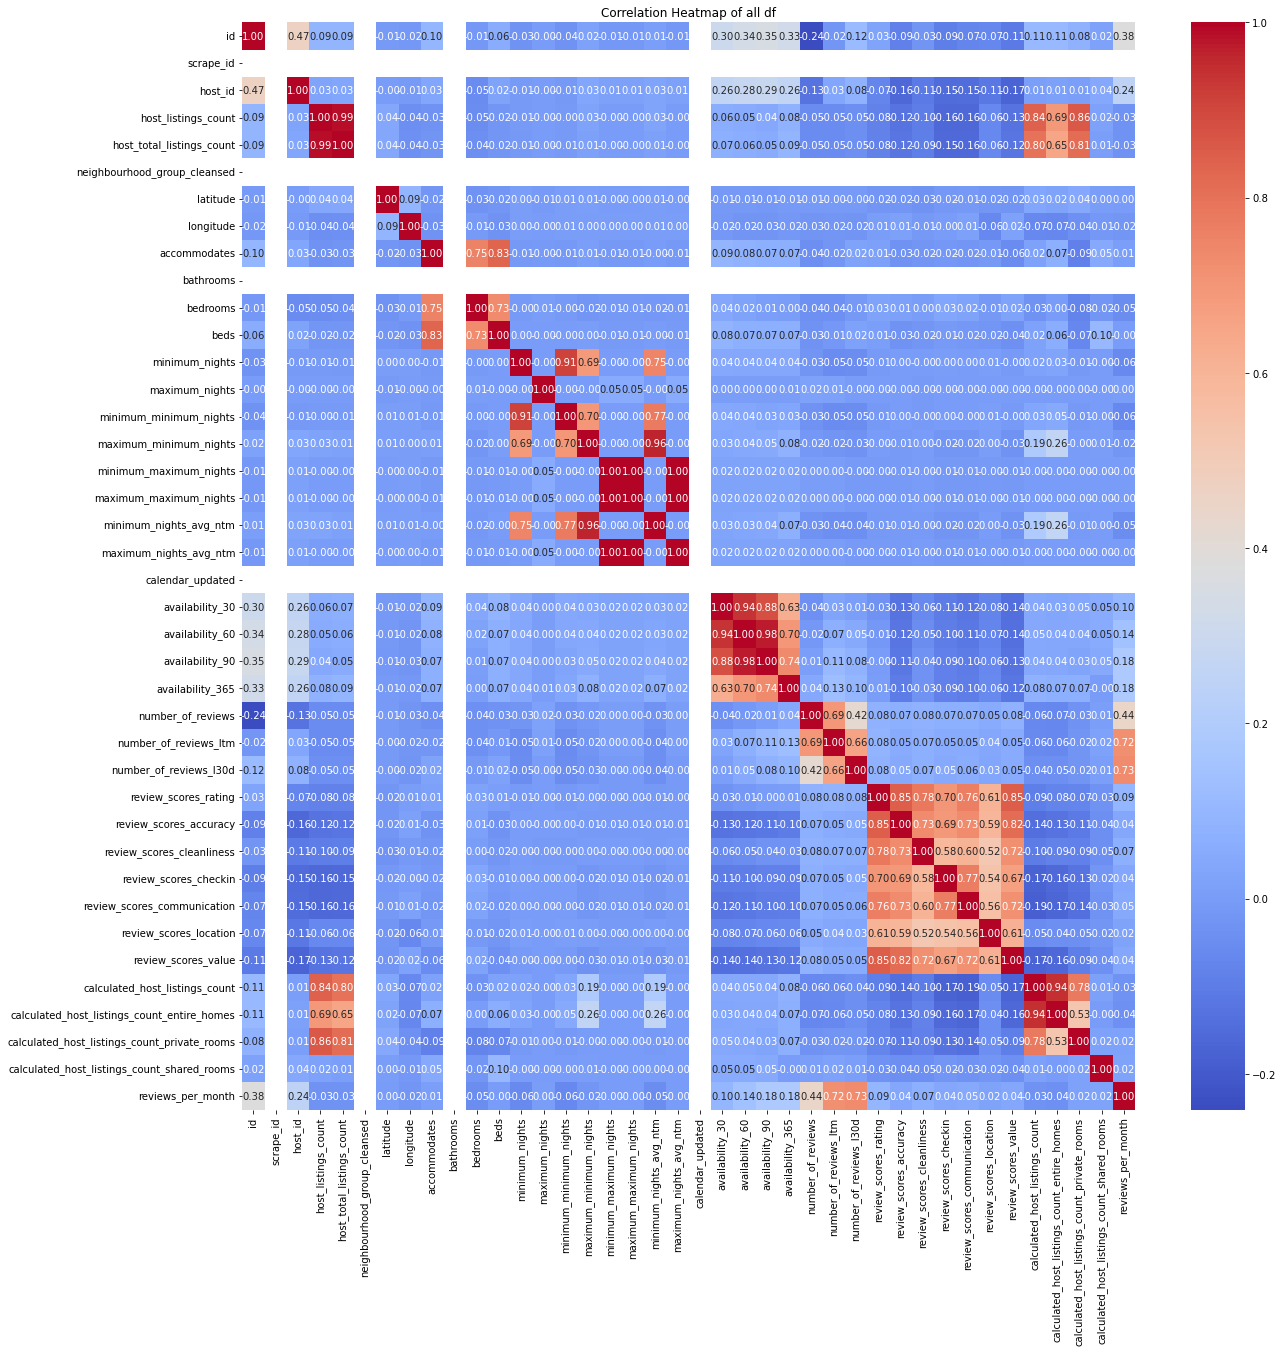

In [7]:
# Calculate correlations for the filtered columns
df_corr = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of all df')
plt.show() 

#### Data Preparation Cleaning

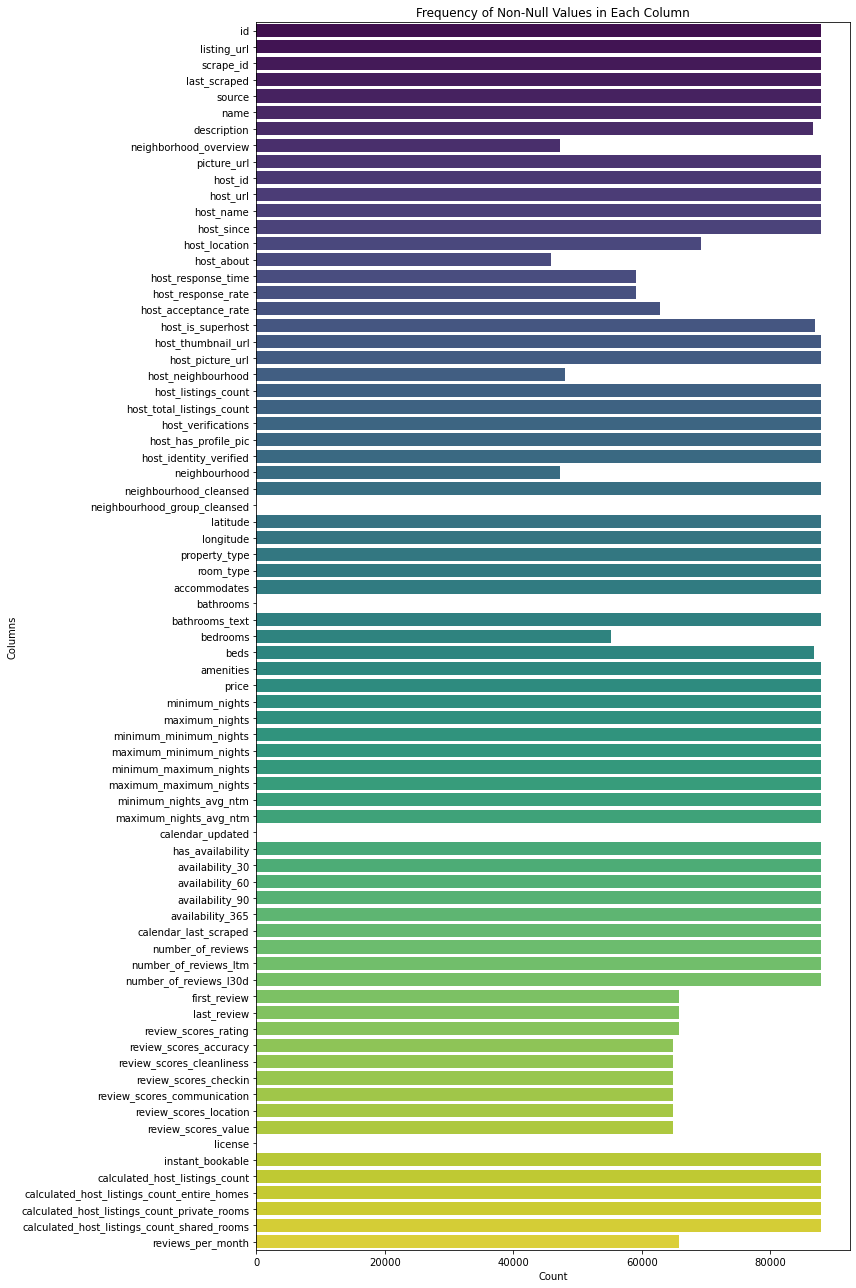

In [8]:
# Count non-null values for each column
data_columns = df.notnull().sum()

# Plot the count of non-null values per column as a horizontal bar plot
plt.figure(figsize=(12, 18)) 
sns.barplot(y=data_columns.index, x=data_columns.values, palette="viridis", orient="h")
plt.title('Frequency of Non-Null Values in Each Column')
plt.xlabel('Count')
plt.ylabel('Columns')
plt.tight_layout()  
plt.show()

In [9]:
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()]
print(f"\nColumns with Missing Values:\n{missing_cols}")


Columns with Missing Values:
Index(['description', 'neighborhood_overview', 'picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 'bathrooms', 'bathrooms_text',
       'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
  

In [10]:
# cleaned_df is df
def initial_eda(df):
    if isinstance(df , pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

#### Data Cleaning

In [11]:
# Format values and datatype
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price'].head(2)

0     42.0
1    175.0
Name: price, dtype: float64

In [12]:
# Remove '%' and convert percentages to float before grouping, but only if the column is not already numeric
percent_columns = ['host_response_rate', 'host_acceptance_rate']

for col in percent_columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].str.replace('%', '', regex=True).astype(float)
        

# Group by 'calculated_host_listings_count' and fill missing values with group-specific mean
for col in percent_columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # Ensure the column is numeric before applying transformations
        df[col] = df.groupby(['calculated_host_listings_count'])[col].transform(
            lambda x: x.fillna(int(x.mean())if not pd.isnull(x.mean()) else 0)
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')
print(df[percent_columns].head(2))

   host_response_rate  host_acceptance_rate
0                90.0                 100.0
1               100.0                  25.0


In [13]:
# Convert date columns
date_columns = ['host_since', 'first_review', 'last_review', 'calendar_last_scraped']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [14]:
# Generalized columns like id and url and other unused cat columns
unwanted_cols = [col for col in df.columns if col.endswith('id') or col.endswith('url') or 'night' in col or col in ['description', 'neighborhood_overview', 'host_name', 'host_about', 'host_location', 'license', 'calendar_updated', 'neighbourhood_group_cleansed']]

# Remove the unwanted columns and save the names of removed columns
removed_columns = df[unwanted_cols].columns.tolist()
df = df.drop(columns=unwanted_cols, inplace=False) 

# Output the results
print(f"Removed {len(removed_columns)} columns:")
print(removed_columns)
print(df.shape)

Removed 24 columns:
['id', 'listing_url', 'scrape_id', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood_group_cleansed', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'license']
(87946, 51)


In [15]:
# checking data 
# dtype columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categ_columns = [col for col in categorical_cols if df[col].nunique() > 2]
binary_columns = [col for col in categorical_cols if df[col].nunique() == 2] # ['host_is_superhost', 'host_identity_verified', 'has_availability', 'instant_bookable']
print(df[categ_columns].nunique())
print(df[binary_columns].nunique())

name                      21356
host_response_time            4
host_neighbourhood          628
host_verifications            9
neighbourhood               881
neighbourhood_cleansed       33
property_type               102
room_type                     4
bathrooms_text               49
amenities                 76626
dtype: int64
last_scraped              2
source                    2
host_is_superhost         2
host_has_profile_pic      2
host_identity_verified    2
has_availability          2
instant_bookable          2
dtype: int64


In [16]:
# host duration : maturity
df['host_since'] = df['host_since'].fillna(df['last_scraped'])
df['host_duration'] = (pd.Timestamp.now() - df['host_since']).dt.days
current_date = pd.Timestamp.now()
df['host_duration_month'] = ((current_date.year - df['host_since'].dt.year) * 12) + (current_date.month - df['host_since'].dt.month)
print(df['host_duration_month'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 87946 entries, 0 to 87945
Series name: host_duration_month
Non-Null Count  Dtype
--------------  -----
87946 non-null  int64
dtypes: int64(1)
memory usage: 687.2 KB
None


In [17]:
df['host_duration_month'].isna().sum()

0

using duration of host categorized by month to get the mean of acceptance rate so that it gan give more accurate data.

In [18]:
## host_acceptance_rate fill missing val
df['host_acceptance_rate'] = df.groupby(['host_duration_month'])['host_acceptance_rate'].transform(
    lambda x: x.fillna(int(x.mean()) if not pd.isnull(x.mean()) else 0)
)
# df = df.drop(['host_duration_month'], axis=1, inplace=False)
print(df['host_acceptance_rate'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 87946 entries, 0 to 87945
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
87946 non-null  float64
dtypes: float64(1)
memory usage: 687.2 KB
None


In [19]:
# org_df = df.copy() # copy df chkpoint

In [20]:
# Convert binary columns
binary_columns = ['host_is_superhost', 'host_identity_verified', 'has_availability', 'instant_bookable']
# df = org_df.copy()
# Convert 't' to 1 and 'f' to 0
for col in binary_columns:
    df[col] = df[col].map({'t': 1, 'f': 0})

# Fill missing values based on the median within 'host_acceptance_rate' groups
for col in binary_columns:
    df[col] = df.groupby('host_acceptance_rate')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0)).astype(int)
#     df[col] = df.groupby('host_acceptance_rate')[col].transform(lambda x: x.fillna(x.mode()))

print(df[binary_columns].head(2)) 
org_df = df.copy()

   host_is_superhost  host_identity_verified  has_availability  \
0                  0                       1                 1   
1                  0                       1                 1   

   instant_bookable  
0                 1  
1                 0  


In [21]:
df[binary_columns].nunique()

host_is_superhost         2
host_identity_verified    2
has_availability          2
instant_bookable          2
dtype: int64

In [22]:
initial_eda(df[categ_columns])

Dimensions : 87946 rows, 10 columns
Total NA Values : 109643 
                           Column Name  Data Type      #Distinct  NA Values
                                  name     object        21356          0
                    host_response_time     object            4      28918
                    host_neighbourhood     object          628      39867
                    host_verifications     object            9          0
                         neighbourhood     object          881      40755
                neighbourhood_cleansed     object           33          0
                         property_type     object          102          0
                             room_type     object            4          0
                        bathrooms_text     object           49        103
                             amenities     object        76626          0


In [23]:
initial_eda(df[binary_columns])

Dimensions : 87946 rows, 4 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                     host_is_superhost      int32            2          0
                host_identity_verified      int32            2          0
                      has_availability      int32            2          0
                      instant_bookable      int32            2          0


In [24]:
initial_eda(df[numerical_cols])

Dimensions : 87946 rows, 30 columns
Total NA Values : 304825 
                           Column Name  Data Type      #Distinct  NA Values
                    host_response_rate    float64           95          0
                  host_acceptance_rate    float64          100          0
                   host_listings_count    float64          130          5
             host_total_listings_count    float64          189          5
                              latitude    float64        43096          0
                             longitude    float64        52916          0
                          accommodates      int64           16          0
                             bathrooms    float64            0      87946
                              bedrooms    float64           21      32774
                                  beds    float64           24       1134
                                 price    float64         1403          0
                       availability_30      int6

In [25]:
# Process bathrooms_text bathrooms 
# Define function to extract numeric values from text
def extract_numeric(value):
    if not isinstance(value, (int, float)):  # Check if the value is not numeric
        match = re.search(r'(\d+\.?\d*)', str(value))  # Search for a number in the text
        return float(match.group(1)) if match else 0.5  # Default to 0.5 for "half bath" or no match
    return value  # If already numeric, return the value as-is

# Fill missing 'bathrooms_text' values with a default string
df['bathrooms_text'] = df['bathrooms_text'].fillna('0 baths')

# Apply the function to extract numeric values
df['bathrooms'] = df['bathrooms_text'].apply(extract_numeric)

# Print the first 3 rows of the 'bathrooms' column
print(df['bathrooms'].isna().head(3))

0    False
1    False
2    False
Name: bathrooms, dtype: bool


In [26]:
# convert host_verifications to a count of values 
df['host_verifications'] = df['host_verifications'].apply(lambda x: len(eval(x)) if pd.notna(x) and x != 'None' else 0)
df['host_verifications'].isna().sum()

0

In [27]:
# org_df = df.copy()

In [28]:
# Define function to extract bedrooms from the name
def extract_bedrooms(name):
    if pd.isna(name):  # Handle missing values directly
        return 1  # Default to 1 for missing or invalid names
    
    name = name.lower()
    match = re.search(r"(\d+)\s*bedroom", name)  # Match "X bedroom"
    if match:
        return int(match.group(1))
    return 1 if "studio" in name else 1  # Return 1 for "studio" or as the default

# Vectorized approach: Update only rows with missing 'bedrooms'
missing_bedrooms_mask = df['bedrooms'].isna()
df.loc[missing_bedrooms_mask, 'bedrooms'] = df.loc[missing_bedrooms_mask, 'name'].map(extract_bedrooms)

print(df['bedrooms'].head(3))

0    1.0
1    2.0
2    1.0
Name: bedrooms, dtype: float64


In [29]:
# convert amenities and host_verifications to a count of values 
df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)


In [30]:
# Create a new column for price per night per guest
df['price_per_guest'] = df['price'] / df['accommodates']

In [31]:
# Extracting year from review date
df_r['review_year'] = pd.to_datetime(df_r['date']).dt.year


In [32]:
# df['number_of_reviews', 'review_scores_location', 'review_scores_value', 'review_scores_communication', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count', 'host_acceptance_rate', 'calculated_host_listings_count_shared_rooms', 'accommodates', 'review_scores_accuracy', 'host_verifications', 'price', 'host_identity_verified', 'bathrooms', 'bedrooms', 'property_type', 'review_scores_cleanliness', 'has_availability', 'amenities_count', 'neighbourhood_cleansed', 'beds', 'instant_bookable', 'host_is_superhost', 'calculated_host_listings_count_entire_homes', 'host_duration_month', 'host_response_rate', 'reviews_per_month', 'review_scores_rating', 'review_scores_checkin', 'availability_30', 'host_duration', 'host_about', 'host_location', 'description', 'neighborhood_overview', 'license', 'calendar_updated', 'neighbourhood_group_cleansed', 'host_name'].info()

In [33]:
# Remove the unwanted colomns - II
filtered_df = df.drop(['host_response_time', 'last_scraped', 'source', 'name', 'latitude', 'longitude', 'room_type', 'host_since', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count','host_has_profile_pic', 'first_review', 'last_review', 'calendar_last_scraped','neighbourhood', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'bathrooms_text' , 'amenities', 'host_duration_month' ], axis=1, inplace=False)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            87946 non-null  float64
 1   host_acceptance_rate                          87946 non-null  float64
 2   host_is_superhost                             87946 non-null  int32  
 3   host_verifications                            87946 non-null  int64  
 4   host_identity_verified                        87946 non-null  int32  
 5   neighbourhood_cleansed                        87946 non-null  object 
 6   property_type                                 87946 non-null  object 
 7   accommodates                                  87946 non-null  int64  
 8   bathrooms                                     87946 non-null  float64
 9   bedrooms                                      87946 non-null 

#### feature ingeneering

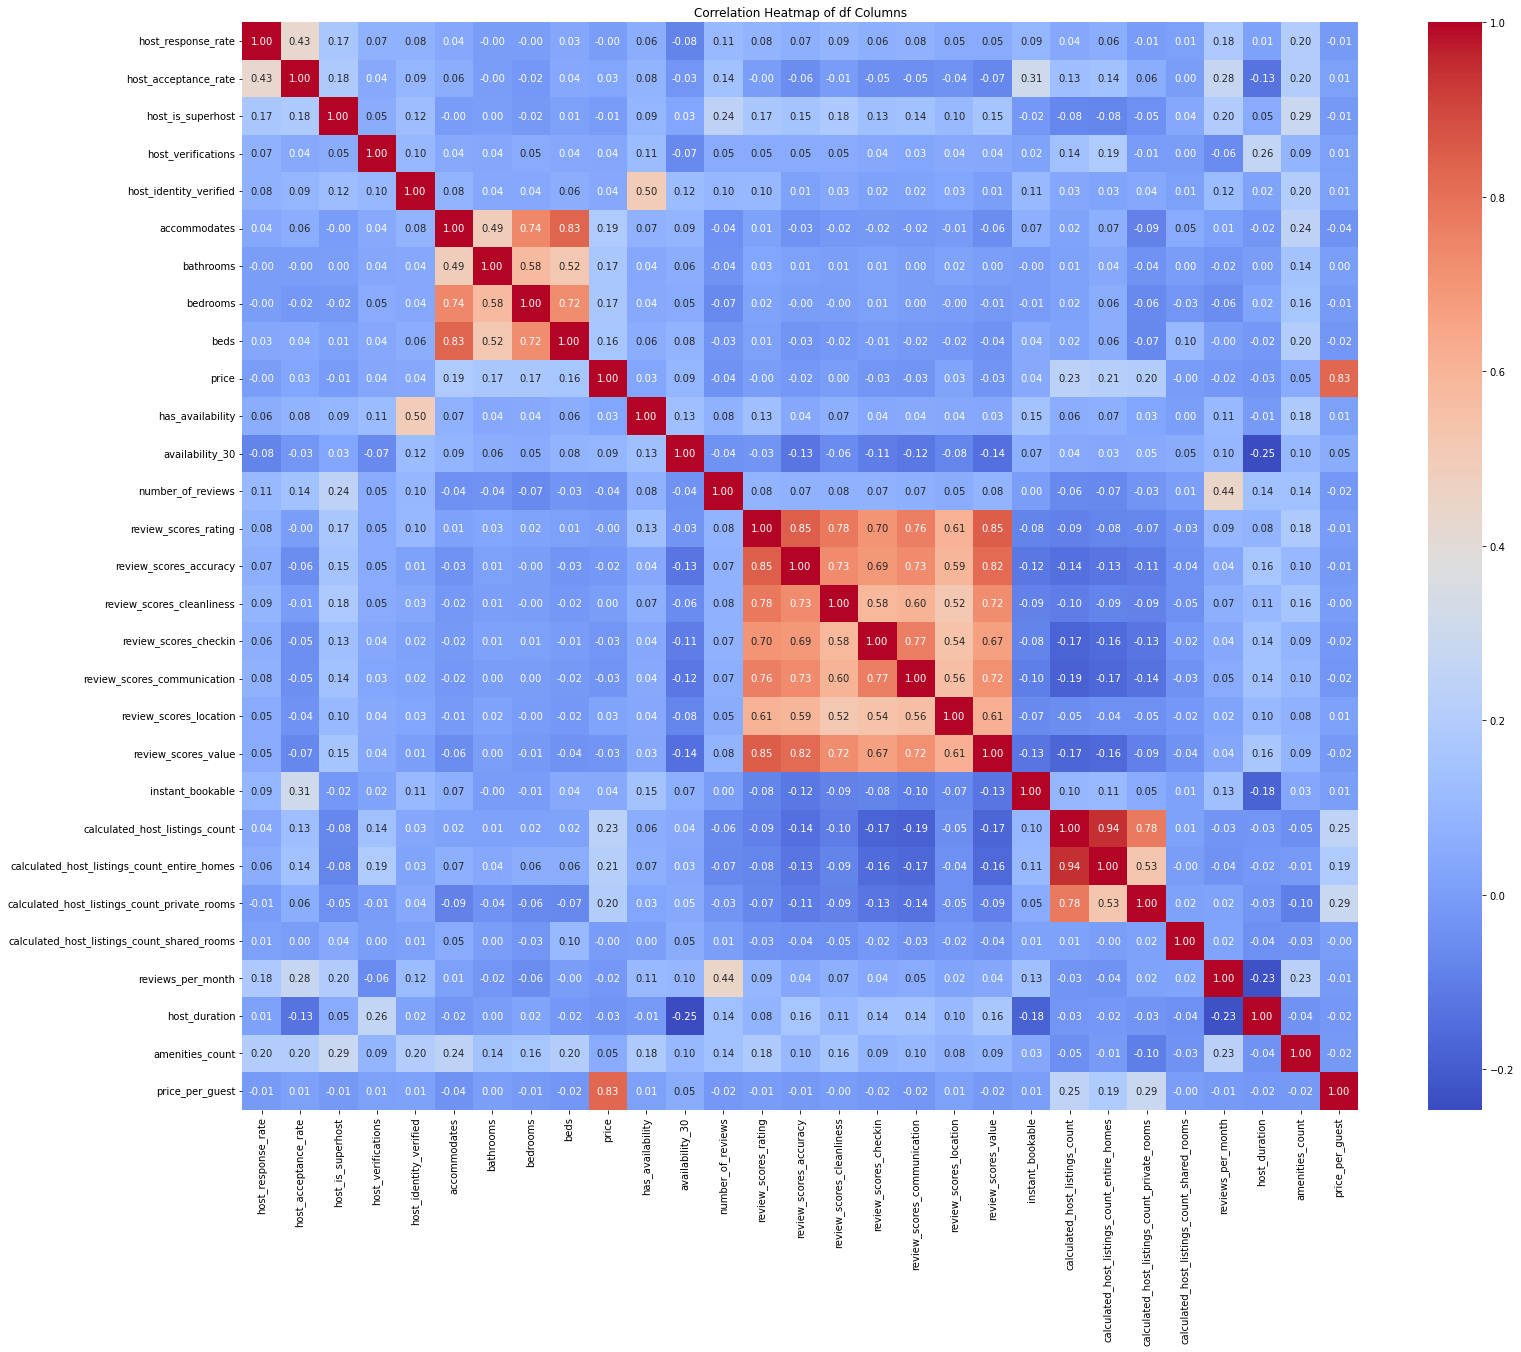

In [34]:
# Calculate correlations for the filtered columns
df_corr = filtered_df.corr()

# Create a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of df Columns')
plt.show() 


In [35]:
filtered_df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'has_availability', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_duration', 'amenities_count', 'price_per_guest'],
      dtype='object')

In [36]:
# filtered_df.to_csv('filtered_data_2.csv', index=False)

In [37]:

# Host scoring
filtered_df['score_host'] = (
    (filtered_df['host_response_rate'] >= 90).astype(int) * 2 +  # Scaled threshold for 90%
    (filtered_df['host_acceptance_rate'] >= 90).astype(int) * 2 +  # Scaled threshold for 90%
    (filtered_df['host_is_superhost'] == 1).astype(int) * 2 +  # Already encoded binary feature
    (filtered_df['host_verifications'] >= 2).astype(int) * 2 +  # Already encoded binary feature
    (filtered_df['host_duration'] >= filtered_df['host_duration'].mean()).astype(int) * 2  # Scaled threshold for 3 months or more
)

# Review scoring
filtered_df['score_review'] = (
    (filtered_df['review_scores_rating'] >= 0.4).astype(int) * 4 +  # Scaled threshold for 90%
    (filtered_df['reviews_per_month'] >= 2).astype(int) * 3 +  # Scaled threshold for 80%
    (filtered_df['review_scores_accuracy'] >= 4).astype(int) * 3  # Scaled threshold for 80%
)

# Listings scoring
filtered_df['score_listings'] = (
    (filtered_df['amenities_count'] >= filtered_df['amenities_count'].mean()).astype(int) * 2 +  # Scaled threshold for 50% of max amenities
    (filtered_df['availability_30'] >= 15).astype(int) * 2 +  # Scaled threshold for at 
    (filtered_df['instant_bookable'] >= 1).astype(int) * 2 +  # Scaled threshold for at 
    (filtered_df['bedrooms'] >= 2).astype(int) * 2 +  # Scaled threshold for at 
    (filtered_df['bathrooms'] >= 1).astype(int) * 2  # Scaled threshold for at     
)

# Final Score
filtered_df['final_score'] = (
    (filtered_df['score_host'] * 2 / 10) +
    (filtered_df['score_review'] * 4 / 10) +
    (filtered_df['score_listings'] * 4 / 10)
)

# Target feature: Good or Bad
threshold = 6  # Threshold for a good listing
filtered_df['listing_quality'] = (filtered_df['final_score'] >= threshold).astype(int)
filtered_df['listing_quality'].nunique()

2

In [45]:
# Group Analysis

# Average price by property type
average_price_by_property = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
print("Average Price by Property Type:")
print(average_price_by_property)

# Number of reviews per year
reviews_per_year = df_r['review_year'].value_counts().sort_index()
print("\nReviews per Year:")
print(reviews_per_year)

Average Price by Property Type:
property_type
Entire villa                         1082.694444
Dome                                  856.000000
Private room in hostel                836.099010
Camper/RV                             740.513514
Room in aparthotel                    611.926829
                                        ...     
Shared room in bus                     30.000000
Shared room in villa                   28.000000
Private room in floor                  28.000000
Shared room in loft                    26.000000
Shared room in serviced apartment      17.000000
Name: price, Length: 102, dtype: float64

Reviews per Year:
2009         1
2010       136
2011       870
2012      3571
2013     10686
2014     21601
2015     45397
2016     84551
2017    122699
2018    170280
2019    221738
2020     66146
2021    110485
2022    346275
2023    376597
Name: review_year, dtype: int64


### Visualizations

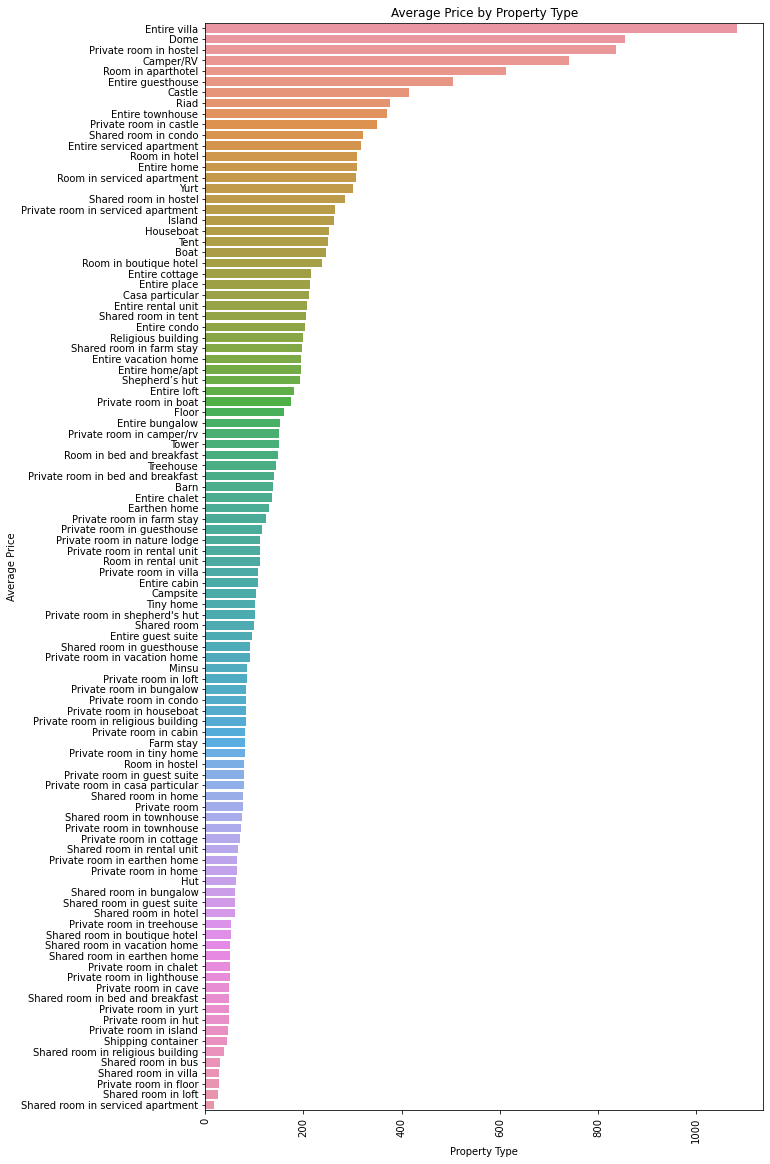

In [46]:
#Visualizing Property Types and Prices

# Room types vs price
plt.figure(figsize=(10, 20))
sns.barplot(x=average_price_by_property.values, y=average_price_by_property.index, orient="h")
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

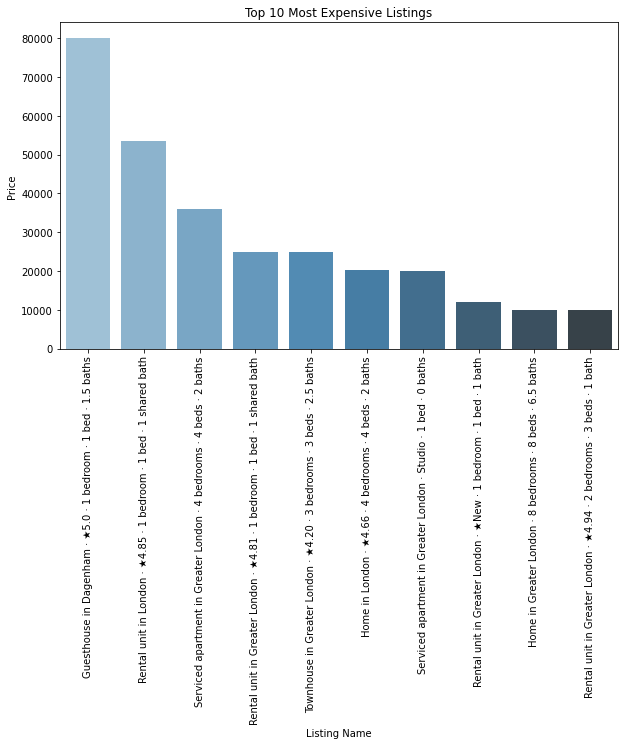

In [47]:
# Top 10 most expensive listings
top_10_exp_l = df.nlargest(10, 'price')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_exp_l, x='name', y='price', palette='Blues_d')
plt.title('Top 10 Most Expensive Listings')
plt.xlabel('Listing Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

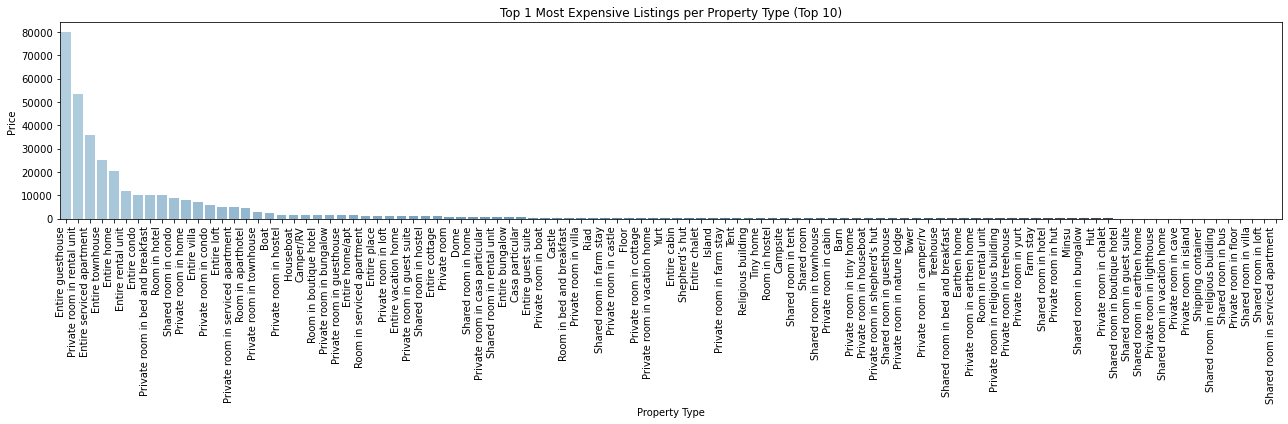

In [53]:
# Group by 'property_type' and select the row with the maximum price for each group
top_1_exp_l = df.loc[df.groupby('property_type')['price'].idxmax()]
top_1_exp_l = top_1_exp_l.sort_values('price', ascending=False)
# Plot the results
# Plot the results
plt.figure(figsize=(18, 6))
sns.barplot(data=top_1_exp_l, x='property_type', y='price', palette='Blues_d')
plt.title('Top 1 Most Expensive Listings per Property Type (Top 10)')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
# plt.yscale('log')  # Optional: Use log scale for better range visibility
plt.tight_layout()
plt.show()


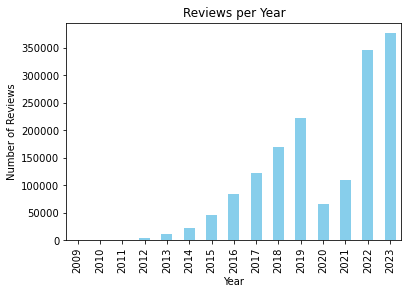

In [54]:
#Reviews Over Time

reviews_per_year.plot(kind='bar', color='skyblue')
plt.title('Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

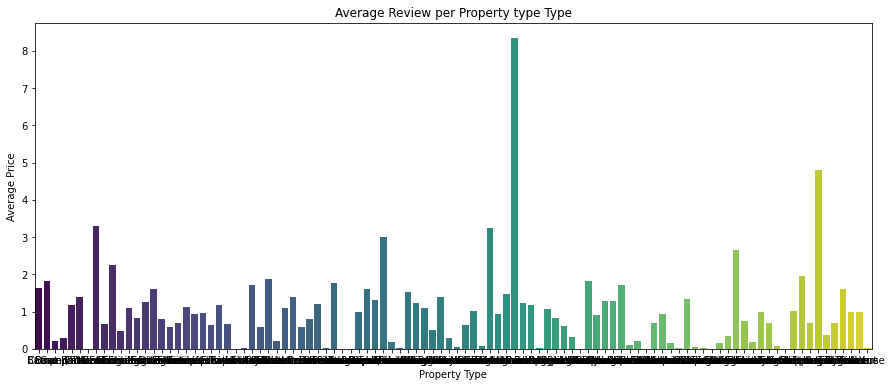

In [58]:
#Average Price per Room Type (Bar Plot)

# Average price per room type
avg_price_property_type = df.groupby('property_type')['reviews_per_month'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(data=avg_price_property_type, x='property_type', y='reviews_per_month', palette='viridis')
plt.title('Average Review per Property type Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.show()

## Impute

In [ ]:
# Apply imputation
# Numerical columns: Replace missing values with the mean
# Categorical columns: Replace missing values with the most frequent category
numerical_cols = filtered_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = filtered_df.select_dtypes(include=['object', 'category']).columns

# Using SimpleImputer for both numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
filtered_df[numerical_cols] = num_imputer.fit_transform(filtered_df[numerical_cols])
filtered_df[categorical_cols] = cat_imputer.fit_transform(filtered_df[categorical_cols])

print(filtered_df[numerical_cols].info())
print(filtered_df[categorical_cols].info())

In [ ]:
# standerdize cat to num

In [ ]:
# Function to encode categorical columns to numeric
def encode_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    le = LabelEncoder()  # LabelEncoder for categorical data
    
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col].astype(str))  # Convert categories to numbers
    return df

# Encode the categorical columns in cleaned_df
cleaned_df = encode_categorical_columns(filtered_df)
cleaned_df.info()

In [ ]:
# Calculate correlations for the filtered columns
df_corr = cleaned_df.corr()

# Create a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of df Columns')
plt.show() 

In [ ]:
cleaned_df.shape # score_host

In [ ]:
# Calculate VIF for numeric features
vif_data = pd.DataFrame()
vif_data["Feature"] = cleaned_df.select_dtypes(include=['float64', 'int32']).columns
vif_data["VIF"] = [
    variance_inflation_factor(cleaned_df.select_dtypes(include=['float64', 'int32']).values, i)
    for i in range(len(cleaned_df.select_dtypes(include=['float64', 'int32']).columns))
]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=True)
print(vif_data_sorted)

In [ ]:
#'score_host', 'score_review', 'score_listings'
final_features = [
    'bedrooms', 'bathrooms', 'instant_bookable', 'has_availability', 
    'host_identity_verified', 'host_acceptance_rate' , 'reviews_per_month', 
    'review_scores_rating' , 'amenities_count', 'availability_30' , 'price'
]
# Target variable
target = 'listing_quality'

In [ ]:
# Filter column names based on keywords
host_columns = [col for col in cleaned_df.columns if 'host' in col]
review_columns = [col for col in cleaned_df.columns if 'review' in col]
listing_info_columns = [col for col in cleaned_df.columns if col not in host_columns + review_columns]  # Remaining columns

print(len(host_columns), len(review_columns), len(listing_info_columns))
print(host_columns, review_columns, listing_info_columns)

In [ ]:
# Step 4: Normalize Numerical Features
# Function to normalize columns using Min-Max Scaling or Standard Scaler
def normalize_columns(columns, method="minmax"):
    subset = filtered_df[columns].fillna(0)
    if method == "standard":
        scaler = StandardScaler()
        return pd.DataFrame(scaler.fit_transform(subset), columns=columns)
    elif method == "minmax":
        return subset.apply(lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() > x.min() else x)

# Normalize the three categories (choose method: 'minmax' or 'standard')
normalized_host = normalize_columns(host_columns, method="standard")
normalized_review = normalize_columns(review_columns, method="standard")
normalized_listing_info = normalize_columns(listing_info_columns, method="standard")


In [ ]:
X = cleaned_df[final_features]
y = cleaned_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Evaluate the Model

In [ ]:
# Train Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

# Predict and Evaluate
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X_train.columns, class_names=decision_tree.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

The decision tree shows strong overall accuracy (90%) and balances performance well across classes. However, it predicts class 0 more effectively (96% recall) than class 1 (81% recall), potentially missing some "good" listings. This could impact recommendations if "good" listings are a priority.

In [ ]:
# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_lr = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

The logistic regression model has an accuracy of 80%, lower than the decision tree's 90%. It predicts "bad" listings (class 0) more accurately (85% recall) than "good" listings (class 1) at 73% recall. This means it may miss a higher number of "good" listings, which could impact recommendations if capturing "good" listings is important.

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': final_features,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

 indicates that amenities_count (39%) and review_scores_rating (25%) are the most influential factors in predicting whether an Airbnb listing is "good" or "bad." Features like reviews_per_month (14%) and bedrooms (8.8%) also contribute significantly. Conversely, host_identity_verified, has_availability, and bathrooms have negligible or no impact, suggesting they might not be critical for the prediction. Focus on the top features for further analysis or tuning.

In [ ]:
# lr
coefficients = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

the logistic regression model, has_availability (2.11), review_scores_rating (1.15), and instant_bookable (0.82) are the most positively influential features, meaning they increase the likelihood of a listing being classified as "good." Interestingly, bathrooms (-0.21) has a negative coefficient, suggesting that fewer bathrooms slightly decrease the likelihood of a listing being "good." Compared to the decision tree, amenities_count (0.07) has a much smaller influence here, showing that feature importance varies by model type.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# Decision Tree ROC and AUC 
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
auc_tree = roc_auc_score(y_test, y_pred_dt)  # Use y_pred_dt for AUC calculation
print(f"Decision Tree AUC: {auc_tree:.4f}")

# Logistic Regression ROC and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
auc_lr = roc_auc_score(y_test, y_pred_lr)
print(f"Logistic Regression AUC: {auc_lr:.4f}")

# plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.show()

The decision tree has a higher AUC (0.885) compared to logistic regression (0.792), indicating it separates "good" and "bad" listings more effectively. This suggests that the decision tree has stronger overall discriminatory power between the two classes.

In [ ]:
from sklearn.model_selection import cross_val_score

# Decision Tree Cross-Validation
cv_dt = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Accuracy: {cv_dt.mean():.4f}")

# Logistic Regression Cross-Validation
cv_lr = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {cv_lr.mean():.4f}")

The cross-validation accuracy for the decision tree (89.1%) confirms its consistency and strong performance across different dataset splits. Logistic regression shows a lower cross-validation accuracy (78.2%), reinforcing that the decision tree is more reliable for predicting Airbnb listing quality in this case.

In [ ]:
from sklearn.metrics import confusion_matrix

# Decision Tree Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Confusion Matrix:\n{conf_matrix_dt}")

# Logistic Regression Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(f"Logistic Regression Confusion Matrix:\n{conf_matrix_lr}")

### Decision Tree:
- **True Negatives (9936)**: Correctly predicted many "bad" listings.
- **False Positives (440)**: A few "bad" listings incorrectly predicted as "good."
- **False Negatives (1354)**: Some "good" listings missed.
- **True Positives (5860)**: Correctly predicted most "good" listings.

### Logistic Regression:
- **True Negatives (8816)**: Correctly predicted many "bad" listings, but fewer than the decision tree.
- **False Positives (1560)**: More "bad" listings misclassified as "good" than the decision tree.
- **False Negatives (1922)**: More "good" listings missed compared to the decision tree.
- **True Positives (5292)**: Fewer correct "good" predictions compared to the decision tree.

### Conclusion:
The decision tree performs better in correctly predicting "good" listings and making fewer errors overall. Logistic regression has a higher number of false positives and false negatives.

#### Hyperparameter Tuning

In [ ]:
#  Decision Tree Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print(f"Best Decision Tree Accuracy: {grid_search_dt.best_score_:.4f}")


After hyperparameter tuning, the decision tree's accuracy improved to 94.26% with optimal parameters:

max_depth = 10: Controls tree depth, preventing overfitting.
min_samples_leaf = 2: Ensures at least two samples per leaf, stabilizing predictions.
min_samples_split = 10: Requires at least 10 samples to split a node, reducing complexity.
This tuning enhances the model's performance, showing significant improvement over the initial 90% accuracy.

In [ ]:
#  Logistic Regression Hyperparameter Tuning:
# Set up the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Grid Search for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
print(f"Best Logistic Regression Accuracy: {grid_search_lr.best_score_:.4f}")


Result :
Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.7992

Explaination:
After hyperparameter tuning, the logistic regression model's accuracy is 79.92% with the optimal parameters:

C = 10: A higher regularization strength helps prevent overfitting.
penalty = 'l2': L2 regularization penalizes large coefficients, improving generalization.
solver = 'liblinear': Suitable for small datasets and supports L2 regularization.
Despite tuning, the logistic regression accuracy remains lower than the decision tree (94.26%), indicating the decision tree is likely the better model for this task.

#### Compare the Models After Tuning:

In [ ]:
# Train Decision Tree with Best Hyperparameters
best_dt = grid_search_dt.best_estimator_
best_dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_best_dt = best_dt.predict(X_test)
print(f"Best Decision Tree Accuracy: {accuracy_score(y_test, y_pred_best_dt):.4f}")
print(f"Best Decision Tree Classification Report:\n{classification_report(y_test, y_pred_best_dt)}")

# Train Logistic Regression with Best Hyperparameters
best_lr = grid_search_lr.best_estimator_
best_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_best_lr = best_lr.predict(X_test)
print(f"Best Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_best_lr):.4f}")
print(f"Best Logistic Regression Classification Report:\n{classification_report(y_test, y_pred_best_lr)}")


After tuning:

### Decision Tree:
- **Accuracy**: 94.26%
- **Precision/Recall**: Strong performance for both classes, with **class 0** (bad listings) having a slight edge in precision and recall.
- **F1-Score**: Balanced F1-scores for both classes (0.95 for class 0, 0.93 for class 1).
- **Conclusion**: The decision tree performs excellently across all metrics and is well-balanced in predicting both "good" and "bad" listings.

### Logistic Regression:
- **Accuracy**: 80.22%
- **Precision/Recall**: Lower recall for class 1 (good listings), indicating more missed positive cases.
- **F1-Score**: Class 1 has a weaker F1-score (0.75), showing room for improvement.
- **Conclusion**: While logistic regression shows decent accuracy, its performance lags behind the decision tree, especially in identifying "good" listings.

### Final Comparison:
The **decision tree** is the better model overall, with higher accuracy and more balanced performance across both classes. The **logistic regression** model, though improved after tuning, still underperforms, especially in recall for class 1.

## Discussion

### Model Creation Summary:

1. **Data Cleaning**:
   - Removed irrelevant columns like price and rate-related features.
   - Converted amenities to a count feature for simplicity.
   - Created new features to represent host, review, and listing data to calculate a final score.
   - Applied a threshold of **6** on the final score to classify listings as **"good"** or **"bad."**

2. **Feature Selection**:
   - Analyzed correlations between features using Heatmaps, Corrilations, VIF, Feature importance and Domain Knowlegde to identify the most important variables for model prediction.

3. **Model Creation**:
   - Built **Decision Tree** and **Logistic Regression** models to predict whether a listing is **"good"** or **"bad."**

4. **Model Evaluation**:
   - Evaluated models using metrics like **accuracy**, **classification report**, **confusion matrix**, and **AUC/ROC curve**.
   - Decision tree showed higher accuracy and better model performance across all metrics.

5. **Hyperparameter Tuning**:
   - Tuned the decision tree and logistic regression models for optimal parameters.
   - Decision tree achieved an accuracy of **94.26%** after tuning, showing significant improvement over logistic regression.

6. **Final Insights**:
   - The decision tree outperformed logistic regression, with higher accuracy and better recall, especially for classifying "good" listings.
   
For the Decision Tree, the most influential feature is amenities_count (with an importance of 38.85%), followed by review_scores_rating (25.05%). These two features have the highest impact on predicting whether a listing is "good" or "bad."

For Logistic Regression, the most influential feature is has_availability (with a coefficient of 2.11), followed by review_scores_rating (1.15), suggesting that listings with availability and higher review ratings are more likely to be classified as "good."

This approach led to the conclusion that the decision tree is the best model for predicting Airbnb listing quality.